___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course. 

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

Finally, you should clustered customers using the ***K-Means Clustering*** method, after that label the clusters.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Tasks

Mentoring Prep. and self study#### 

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters* 

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given. 

#### Import Libraries

In [3]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

Bu calisma ile gercek dunya verilerinde cumulative problemlere nasil yaklasilmali, bunu gorecegiz.

#### Load Dataset

Data setinde; musterilere ait ID numaralari,cinsiyet, yas, yillik gelir, 1-100 arasinda musterinin yaptigi harcamalarin skorlamasi var. Skorlari dusuk olanlar az harcama yapan, yuksek olanlar cok harcama yapan musteriler. 

Clustering algoritmalarini genel olarak burda oldugu gibi segmentesyon amaciyla kullanacagiz. Bu tarz datalarda daha az domain bilgisine ihtiyac duyulur. Bu data seyinde musterileri gelir durumlarina, yaslarina, c'ns'yetlerine gore az harcama yapanlar-cok harcama yapanlar gibi gruplara ayirabiliriz. Calismanin sonunda olusan gruplara gore magazanin elinde bulundurmasi gereken malzemeler neler olmalidir, az harcama yapanlarin harcamalarini artirmaya yonelik ne gibi calismalar yapilabilir gibi stratejiler gelistirilebilir.

In [4]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Explore Data

You can rename columns to more usable, if you need.

In [5]:
df.rename(columns={'Annual Income (k$)':'Annual_Income','Spending Score (1-100)':'Spending_Score'},inplace=True)

In [6]:
df.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df.shape

(200, 5)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual_Income   200 non-null    int64 
 4   Spending_Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
df.describe().T   # Degerler arasinda herhangi bir problem gorunmuyor.

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual_Income,200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending_Score,200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


Musterinin magazada kacinci musteri oldugunu belirten CustomerID sutununa gerek yok. Bu yuzden bu sutunu dusuruyoruz :

In [10]:
df.drop(columns= "CustomerID", inplace=True)

In [11]:
df.head()

,Gender,Age,Annual_Income,Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


51 tane farkli yas grubu; 64 tane farkli gelir grubu; 84 tane de farkli harcama skoru var :

In [12]:
df.nunique()

Gender             2
Age               51
Annual_Income     64
Spending_Score    84
dtype: int64

---
---

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





Musterilerin cogunlugunun 27-35 yas grubu arasinda oldugunu goruyoruz. Bunu takiben 18-23 yas grubu ve 48-50 yas grubu geliyor. Sadece bu bilgiye bakarak magazanin bu yas gruplarina yonelik stratejiler gelistirmesi gerektigi soylenebilir :

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

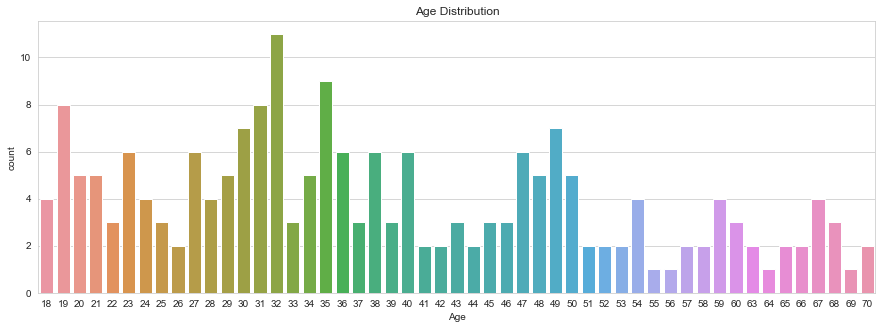

In [13]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x ='Age', data = df)
plt.title('Age Distribution')
plt.xlabel('Age')
ax.bar_label(ax.containers[0]);

Musterilerin yillik gelirleri cogunlukla 54 bin dolar - 78 bin dolar arasinda degisiyor. Demek ki magaza, orta gelirli bir kitleye hitap ediyor :

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

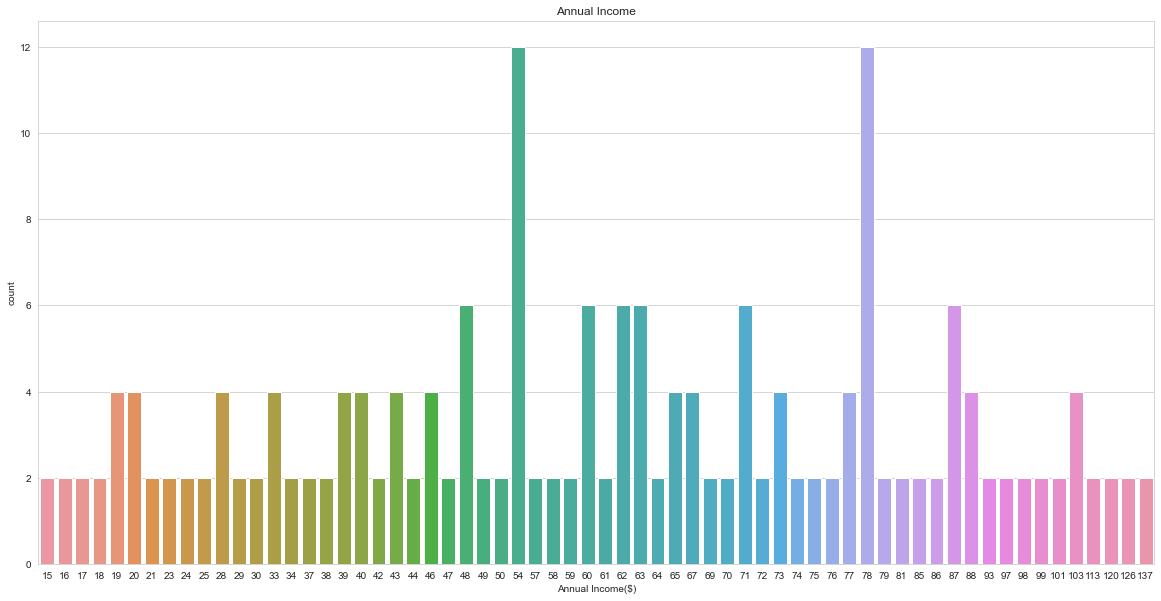

In [16]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='Annual_Income', data=df)
plt.title('Annual Income')
plt.xlabel('Annual Income($)')
ax.bar_label(ax.containers[0]);

Harcama skorlarinin 35-60 arasinda degistigini goruyoruz. Hitap edilen musteri kitlesi orta gelirli oldugu icin bu beklenen bir durum. Magaza tarafindan bu harcama skorlarina gore stratejiler gelistirilebilir :

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

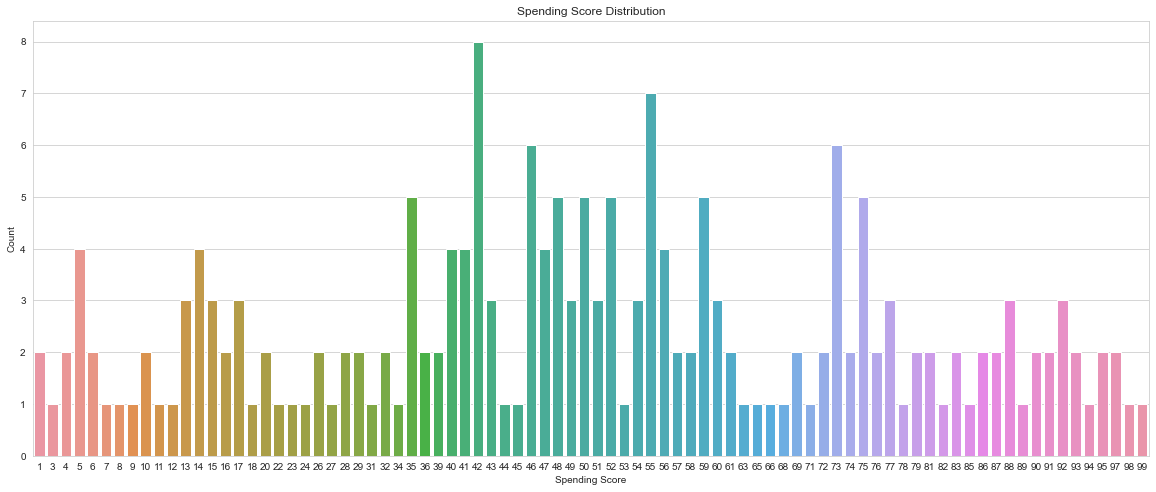

In [15]:
plt.figure(figsize=(20,8))
ax = sns.countplot(x='Spending_Score', data=df)
plt.title('Spending Score Distribution')
plt.xlabel('Spending Score')
plt.ylabel('Count')
ax.bar_label(ax.containers[0]);

Yukarida elde ettigimiz inside' lari asagida birlikte gorelim :

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

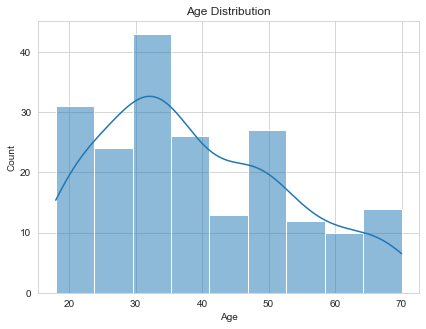

In [17]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
ax = sns.histplot(x='Age', data=df, kde =True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
ax.bar_label(ax.containers[0]);

plt.subplot(1,2,2)
ax = sns.histplot(x ='Annual_Income', data=df, color='red', kde = True)
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income')
plt.ylabel('Count')
ax.bar_label(ax.containers[0]);

Musterilerin cinsiyetlerine ve yaslarina gore tercihleri de farkli olacagi icin musteri kitlesinin cinsiyetlerine de baktik. Musteri kitlesinin cogunlugunu bayanlarin olusturdugunu goruyoruz :

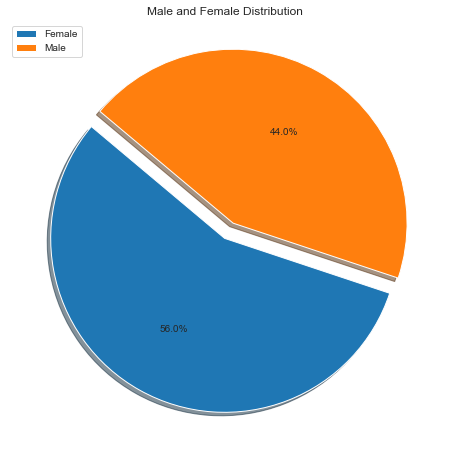

In [19]:
plt.figure(figsize=(8,8))

explode = [0, 0.1]
plt.pie(df['Gender'].value_counts(), explode=explode, autopct='%1.1f%%', shadow=True,startangle=140)
plt.legend(labels=['Female','Male'])
plt.title('Male and Female Distribution')
plt.axis('off');

Feature' lar arasindaki corr iliskisine baktigimizda; cok anlamli bir iliski olmasa da yas buyudukce harcamanin azaldigini goruyoruz. Gelir arttikca harcamanin fazla olmasini bekleriz fakat ikisi arasinda guclu bir iliski yok. Demek ki geliri yuksek olan kisim para harcamiyor :

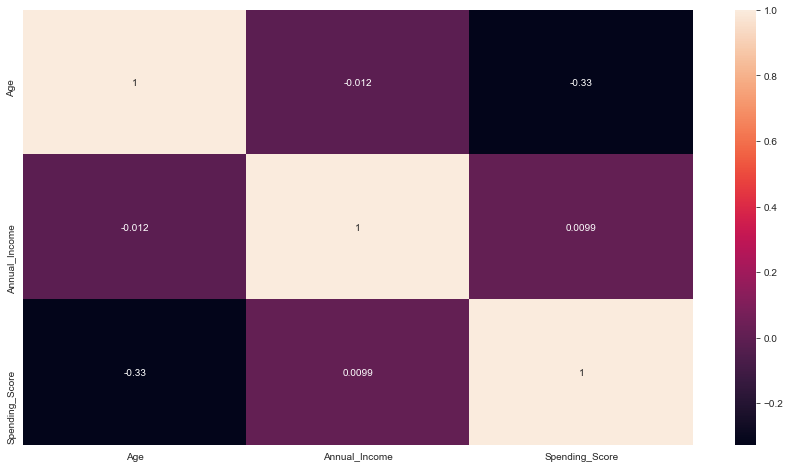

In [20]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

Cinsiyet ve harcama skorlari arasindaki iliskiye bakmak icin asagidaki __stripplot__ grafigini cizdirdik (Object feature' lar icin). Harcama skorlari erkeklerde 40-60 degerleri arasinda yogunlasmis; kadinlarda da 40-60 ve 80-90 degerleri arasinda yogunlasmis. Yuksek harcama skorlarinin kadinlarda daha yuksek oldugunu soyleyebiliriz. __boxplot__' ta da cinsiyete gore yogunlasan bolgeleri goruyoruz. __violinplot__' ta ise hem stripplot hem de boxplot' ta elde ettigimiz bilgileri birlikte gorebiliyoruz. Yani hem yogunlasan bolgeleri hem de boxplot' taki whiskers' lari ayrintili bir sekilde gozleyebiliyoruz. Yogunlugun nerelerde toplandigina bakmak icin violinplot kullanilabilir :

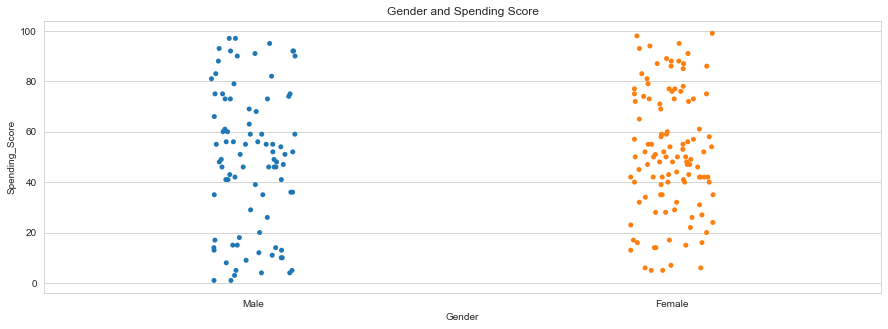

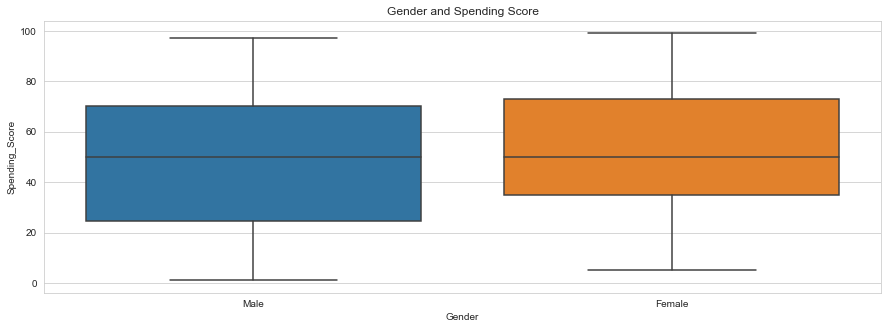

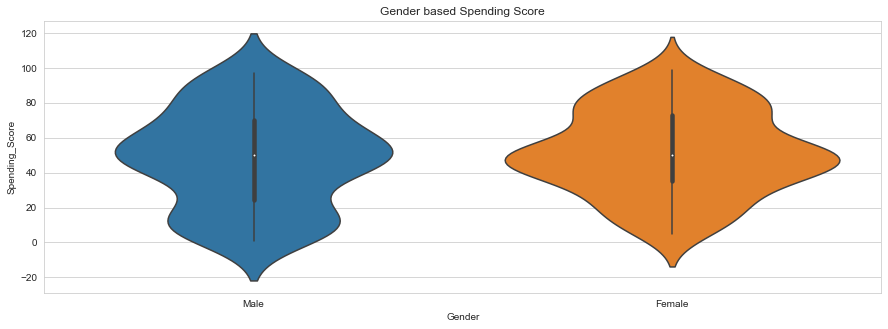

In [21]:
plt.figure(figsize=(15,5))
sns.stripplot(x='Gender', y='Spending_Score', data=df)
plt.title('Gender and Spending Score')
plt.show()

plt.figure(figsize=(15,5))
sns.boxplot(x='Gender', y='Spending_Score', data=df)
plt.title('Gender and Spending Score')
plt.show()

plt.figure(figsize=(15,5))
sns.violinplot(x='Gender', y='Spending_Score', data=df)
plt.title('Gender based Spending Score')
plt.show()

Yillik gelirin hem erkek hem de bayanlarda 75 bin dolar civarlarinda yogunlastigini goruyoruz :

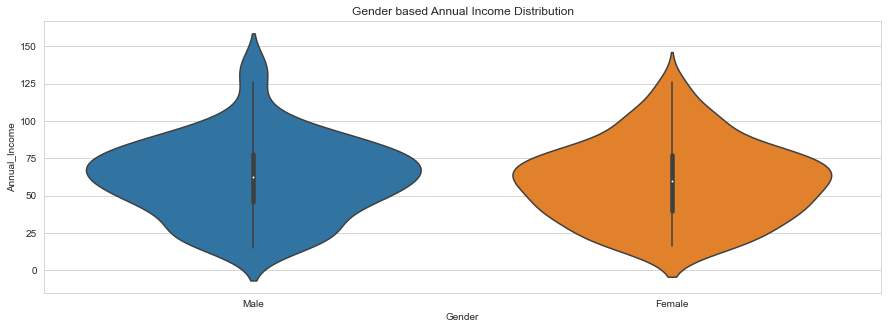

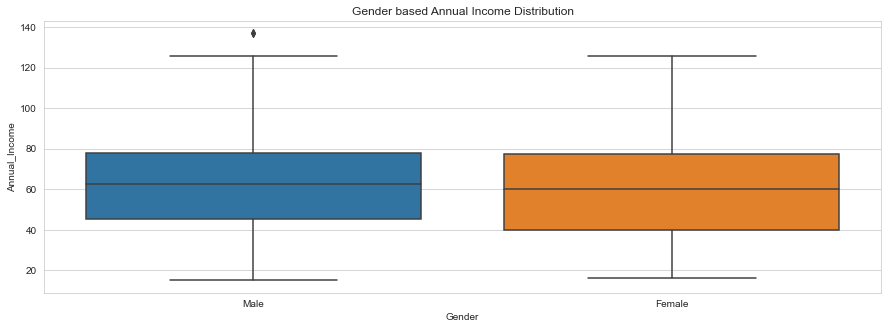

In [22]:
plt.figure(figsize=(15,5))
sns.violinplot(x='Gender',y='Annual_Income', data=df)
plt.title('Gender based Annual Income Distribution')
plt.show()

plt.figure(figsize=(15,5))
sns.boxplot(x='Gender',y='Annual_Income', data=df)
plt.title('Gender based Annual Income Distribution')
plt.show()

pairplot' ta Age ile Annual_Income arasinda ve Age ile Spending_Score arasinda herhangi bir bilgi elde edemiyoruz fakat Annual_Income ve Spending_Score arasinda guzel bir dagilim var. Aldigimiz ilk inside' lara gore 5 grup olusturmamiz gerektigini soyleyebiliriz :

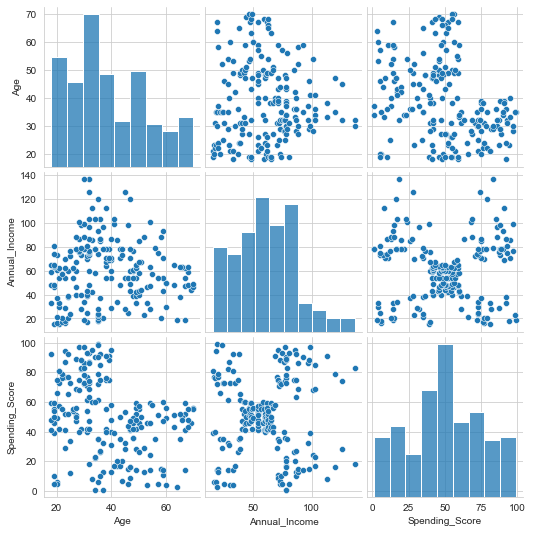

In [23]:
sns.pairplot(df);

Annual_Income ve Spending_Score' in cinsiyetlere gore ayrimina baktik. Hem yillik geliri yukse hem de harcamasi yuksek olan grubun cogunlugunu bayanlar olusturuyor. Diger gruplardaki cinsiyet oranlari hemen hemen birbirine yakin. 

Sol alttaki grup, yillik geliri az ve az harcayanlar grubu. Sol ustteki grup yillik geliri dusuk fakat cok harcama yapan grup (Bu iki grubun gelirleri dusuk oldugu icin para kazandirmayan gruplar). Ortadaki grup, yillik geliri ortalama ve harcama skorlari da ortalama olan grup. Sag alttaki grup, yillik geliri fazla ve harcama yapmayan grup. Sag ustteki grup ise hem yillik gelirleri fazla hem de cok harcama yapan grup. 

Yillik geliri fazla olan ve yuksek harcama yapan grup, en fazla kâri getirecek olan grup. Bu yuzden ilk olarak bu musterileri kaybetmemek gerekir. Ikinci olarak, yillik geliri yuksek olan fakat harcama yapmayan gruba yonelik stratejiler bulunmali. Ortalama musteri gruplarinin da harcamlarini artirmaya yonelik calismalar yapilmali. Geliri az olan fakat cok harcama yapan grup elde tutulmaya calisilmali, yillik geliri az olan ve harcamasi az olan gruba ise biraz harcamaya tesvik edecek kucuk calismalar yapilabilir. Clustering icin hangi feature' lar daha onemli, burada bunun analizini yapmis olduk :

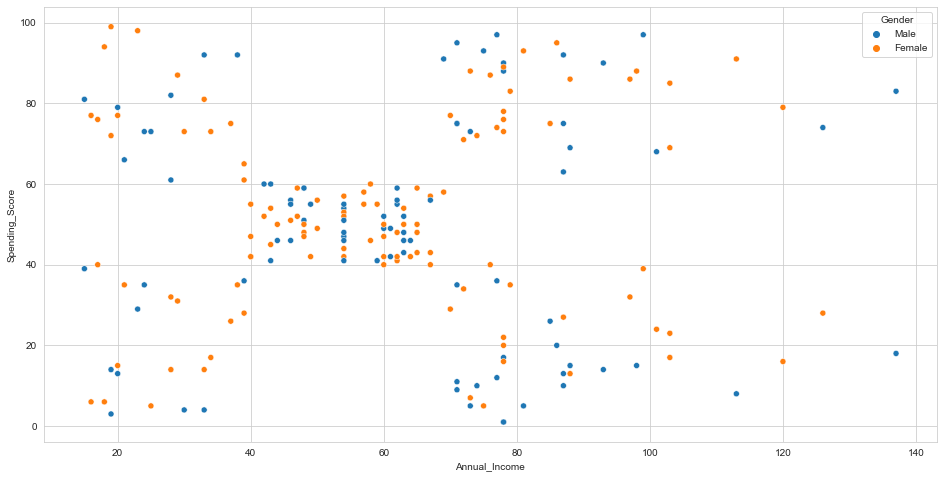

In [20]:
plt.figure(figsize=(16,8))

sns.scatterplot(x ='Annual_Income', y='Spending_Score', data=df, hue = "Gender")
plt.show()

---
---

## 3. Cluster Analysis

The main purpose of this project is to perform [cluster analysis](https://en.wikipedia.org/wiki/Cluster_analysis#:~:text=Cluster%20analysis%20or%20clustering%20is,in%20other%20groups%20(clusters).) with the [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) algorithm. 

You can perform many [cluster analysis](http://www.stat.columbia.edu/~madigan/W2025/notes/clustering.pdf) using different variables. If you use a maximum of two variables for each cluster analysis, you can identify cluster labels more clearly.

First, the K-Means algorithm expects you to determine the number of clusters (*n_clusters*). You can determine the optimal number of clusters for each cluster analysis in various ways. In this case, you are expected to use the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering).

Finally, different information is obtained in each analysis. Therefore, different labeling should be done as a result of each cluster analysis. 

Labeling example: 

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

### Clustering based on Age and Spending Score - X1

Cok fazla feature uzerinden clustering yapildiginda kumeleme kalitesi bozuldugu icin, hangi 2 feature arasinda clustering islemi yapilirsa en kaliteli kumeleme yapilabilir, buna bakacagiz. Ilk olarak yas ve harcama skorlari arasindaki clustering kalitesine bakalim :

#### *i. Create a new dataset with two variables of your choice*

In [21]:
df_2 = df.drop(columns="Gender")   # Dummies feature' lar clustering islemlerinde dusurulmeli.

In [22]:
from pyclustertend import hopkins

In [23]:
hopkins(df_2, df_2.shape[0])   # Hopkins score 0.5' in altinda yani clustering islemi icin uygun.

0.31238456125759767

In [24]:
X1 = df.loc[:,['Age','Spending_Score']]
X1

,Age,Spending_Score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


In [25]:
hopkins(X1, X1.shape[0])

0.2805409416667204

#### *ii. Determine optimal number of clusters*

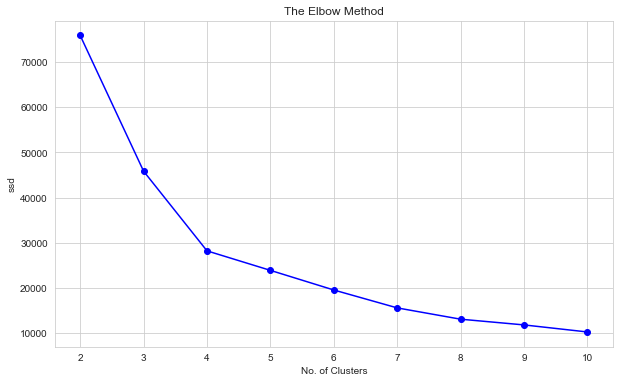

In [26]:
from sklearn.cluster import KMeans

ssd =[]
for n in range(2,11):
    kmeans=KMeans(n_clusters=n,random_state=42)
    kmeans.fit(X1)
    ssd.append(kmeans.inertia_)
plt.figure(figsize=(10,6))
plt.plot(range(2, 11), ssd, "bo-")
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('ssd')
plt.show()

In [27]:
ssd

[75949.15601023017,
 45840.67661610868,
 28165.583566629342,
 23838.24882164619,
 19483.1179104427,
 15514.193134351031,
 13006.483628851023,
 11738.020296954506,
 10173.039478114479]

In [28]:
pd.Series(ssd).diff()

0             NaN
1   -30108.479394
2   -17675.093049
3    -4327.334745
4    -4355.130911
5    -3968.924776
6    -2507.709506
7    -1268.463332
8    -1564.980819
dtype: float64

In [29]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

,0
1,NaN
2,30108.479394
3,17675.093049
4,4327.334745
5,4355.130911
6,3968.924776
7,2507.709506
8,1268.463332
9,1564.980819


<AxesSubplot:>

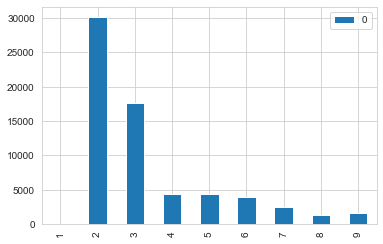

In [30]:
df_diff.plot(kind='bar');

Elbow metoduna gore, yellowbrick' e gore, Silhouette Score' a gore keskin dususun durdugu nokta 4. n_clusters=4 secilmeli. (Fazla feature' larda bu yontemlerin verdigi sayilar farklilik gosteriyordu. 2 feature ile daha saglikli sonuclar elde ettik; iuc yontem de ayni sayiyi verdi.)

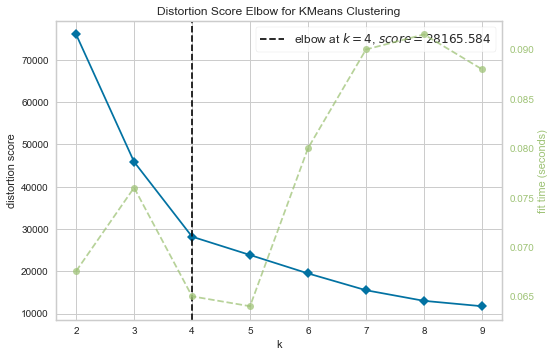

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [31]:
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans(random_state=42)
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(X1)
visu.poof()

In [32]:
from sklearn.metrics import silhouette_score
range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X1)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X1, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.4692341232501655
For n_clusters=3, the silhouette score is 0.45300127016521263
For n_clusters=4, the silhouette score is 0.49973941540141753
For n_clusters=5, the silhouette score is 0.43350225495428363
For n_clusters=6, the silhouette score is 0.4376965763059772
For n_clusters=7, the silhouette score is 0.42313509747504796
For n_clusters=8, the silhouette score is 0.43215030177487107
For n_clusters=9, the silhouette score is 0.41485342159923116
For n_clusters=10, the silhouette score is 0.4141899863508767


Cluster' lar arasi dagilima baktigimizda butun kumelerin ayni kalitede oldugunu soyleyebiliriz :

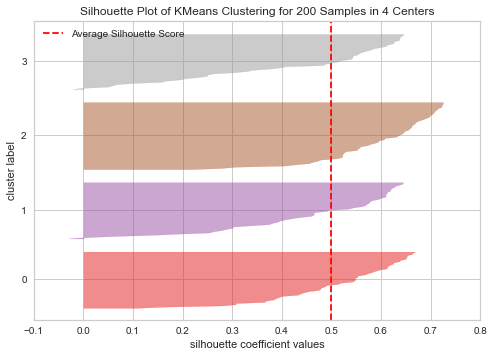

In [33]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=4, random_state=42)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(X1)    # Fit the data to the visualizer
visualizer.poof();

### Why silhouette_score is negative?

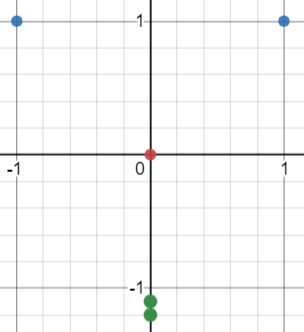

Mavilerin ayri bir kume, yesillerin ayri bir kume oldugunu farzedelim. 0 noktasindaki ise yeni gozlemimiz. Bunun hangi kumeye gidecegine karar verecegiz. 

Sample' in hangi kumeye atanacagi islemi yapilirken; her kumenin orta noktasi bulunur ve sample hangi cumeye daha yakin ise oraya atanir. Mavi noktalarin orta noktasi 1, yesillerin orta noktasi ise -1' in biraz alti. Mavilerin orta noktasi sample' a daha yakin oldugu icin sample, mavilerin oldugu kumeye atanir. 

__b -->__ Gozlemin merkeze olan uzakligi (Burada b=1)

__a-->__ Gozlemin atandigi kumelerdeki elemanlara olan uzakliginin ortalamasi (Burada a = √2+√2 = 2√2/2 = √2))

__Silhouette Score-->__ (1-√2) / √2 = -0.29

Yesillerin oldugu kume kendi iclerinde siki bir sekilde kumelenmisken, mavilerin oldugu kume elemanlarinin kendi aralarindaki mesafe oldukca fazla. Eger Silhouette skoru (-) deger aliyorsa, o kumedeki sample' lar birbirleri ile iyi kumelenememis, aradaki mesafe uzak demektir. Bu durumda kumeleme sayisinin artirilmasi gerekir. Silhouette skorunun 0' a yakin veya 0' dan kucuk deger almasi demek, cluster sayisinin artirilmasi gerek demektir.

#### *iii. Apply K Means*

Baktigimiz butun metrikler n_clusters=4 secmemiz gerektigini soyledigi icin, bu sekilde modelimizi kurduk :

In [34]:
kmeans = KMeans(n_clusters = 4, random_state=42)

In [35]:
kmeans.fit_predict(X1)     # Her sample icin cluster' lar belirlendi.

array([3, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 3, 1, 2, 3, 2,
       1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 3,
       1, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 2, 3, 2, 0, 2, 1, 2, 1, 2,
       3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

kmeans' den aldigimiz cluster' lari datamizin sonuna ekledik. Her sample' in hangi kumeye gittigini datamizda gorebiliyoruz :

In [36]:
X1["cluster_Kmeans"] = kmeans.fit_predict(X1) #kmeans.labels_

In [37]:
X1

,Age,Spending_Score,cluster_Kmeans
0,19,39,3
1,21,81,2
2,20,6,1
3,23,77,2
4,31,40,3
...,...,...,...
195,35,79,2
196,45,28,1
197,32,74,2
198,32,18,1


#### *iv. Visualizing and Labeling All the Clusters*

Olusturdugumuz cluster' lara gore asagida gorsellestirme yapip center' lari da ustlerine atadik. Renklendirmeyi cluster_Kmeans' e gore yapmasini istedik.

Age ve Spending_Score ile yaptigimiz kumelemede; harcama skoru dusuk olanlarin her yas grubunda oldugunu goruyoruz. Harcama skoru 40-60 arasi olanlarin iki gruba bölündüğünü ve 20-40 yas grubu ve 40-70 yas grubu arasinda degistigini goruyoruz. Harcama skoru en fazla olan yas grubunun da 20-40 yas arasinda oldugunu goruyoruz. Sadece yas acisindan bakarsak, harcama skorlarinin 20-40 yas arasinda yogunlastigini goruyoruz. Demek ki genc kitle para harcamaya daha yatkin. Yasi fazla olup harcama skoru da yuksek olan bir grup da yok. Bu grup icin harcatma politikalari gelistirilebilir. Yas ve harcama skorlari ile cok ayrintili inside' lar elde edemedik :

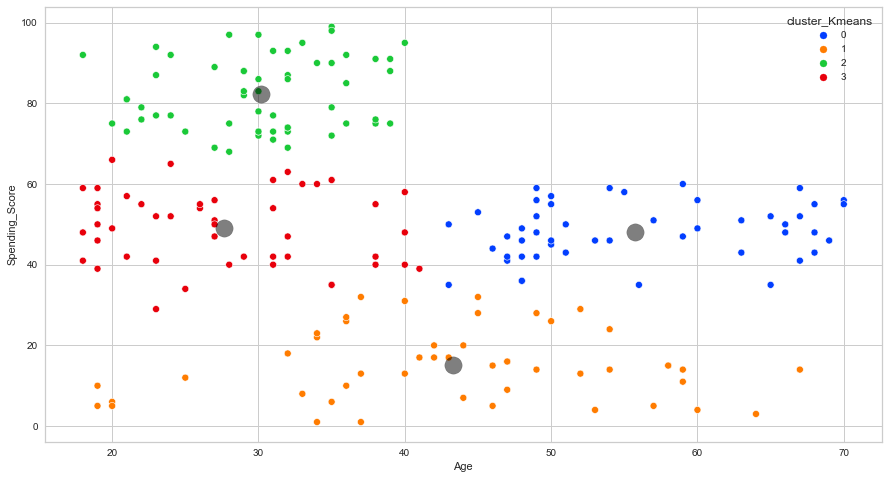

In [38]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='Age', y='Spending_Score', hue='cluster_Kmeans', data=X1, palette="bright")
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=300, alpha=0.5);

### Clustering based on Annual Income and Spending Score - X2

#### *i. Create a new dataset with two variables of your choice*

Annual_Income ve Spending_Score feature' lari ile yeni bir clustering islemi yapip daha kaliteli bir sonuc elde edebiliyor muyuz, buna bakacagiz :

In [39]:
X2 = df.loc[:,['Annual_Income','Spending_Score']]
X2.head()

,Annual_Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [40]:
hopkins(X2, X2.shape[0])    # Clustering islemi icin uygun.

0.2864736250646522

#### *ii. Determine optimal number of clusters*

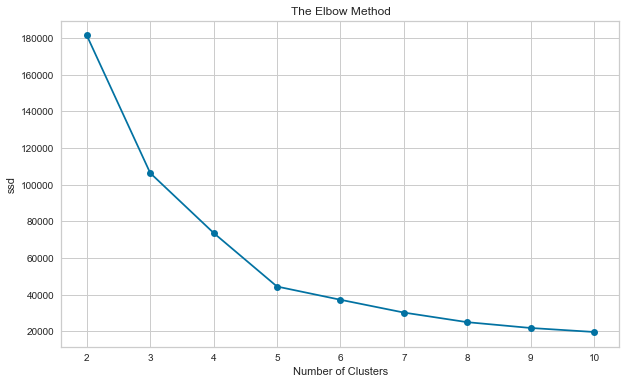

In [41]:
ssd =[]
for n in range(2,11):
    kmeans=KMeans(n_clusters=n, random_state=42)
    kmeans.fit(X2)
    ssd.append(kmeans.inertia_)
plt.figure(figsize=(10,6))
plt.plot(range(2, 11), ssd, "bo-")
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('ssd')
plt.show()

In [42]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

,0
1,NaN
2,75015.222897
3,32668.584023
4,29231.333592
5,7214.640937
6,6974.157303
7,5247.817858
8,3161.674067
9,2178.092434


<AxesSubplot:>

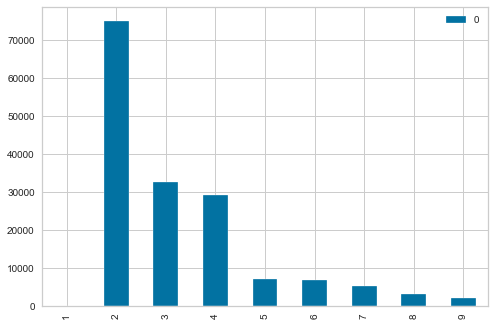

In [43]:
df_diff.plot(kind='bar')

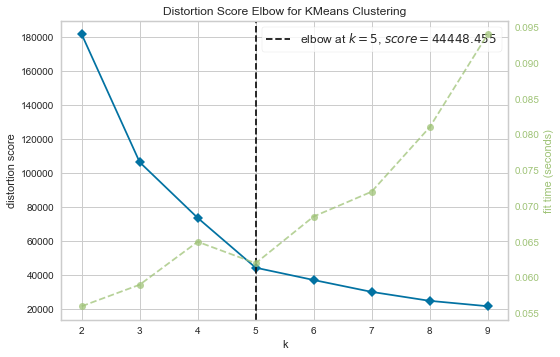

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [44]:
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans(random_state=42)
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(X2)
visu.poof()

Elbow method, yellowbrick ve Silhouette score' a gore keskin dususun durdugu nokta 5. n_clusters=5 olarak secilmeli.

In [46]:
from sklearn.metrics import silhouette_score
range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X2)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X2, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.2968969162503008
For n_clusters=3, the silhouette score is 0.46761358158775435
For n_clusters=4, the silhouette score is 0.4931963109249047
For n_clusters=5, the silhouette score is 0.553931997444648
For n_clusters=6, the silhouette score is 0.53976103063432
For n_clusters=7, the silhouette score is 0.5264283703685728
For n_clusters=8, the silhouette score is 0.45827056882053113
For n_clusters=9, the silhouette score is 0.4565077334305076
For n_clusters=10, the silhouette score is 0.45925273534781125


Kumeleme kalitesine baktigimizda tum kumelerin birbirleri ile yaklasik skorlar aldigini goruyoruz. 0 kumesinde biraz daha fazla yogunlasma var :

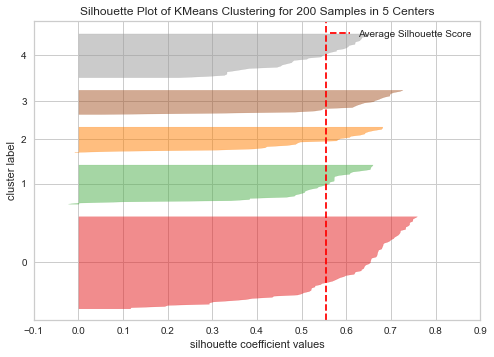

In [45]:
model4 = KMeans(n_clusters=5, random_state=42)
visualizer = SilhouetteVisualizer(model4)

visualizer.fit(X2)    # Fit the data to the visualizer
visualizer.poof();

#### *iii. Apply K Means*

n_clusteres=5 olmasinda karar kildik. Bu deger ile modelimizi kurduk :

In [47]:
kmeans2 = KMeans(n_clusters=5, random_state=42)
kmeans2.fit_predict(X2)            # Her sample icin cluster' lar belirlendi.

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

kmeans2' den aldigimiz cluster' lari datamizin sonuna ekledik. Her sample' in hangi kumeye gittigini datamizda gorebiliyoruz. Bu haliyle datamizi kumeleriyle birlikte gorsellestirecegiz :

In [48]:
X2['cluster_Kmeans'] = kmeans2.fit_predict(X2) #kmeans2.labels_
X2

,Annual_Income,Spending_Score,cluster_Kmeans
0,15,39,2
1,15,81,3
2,16,6,2
3,16,77,3
4,17,40,2
...,...,...,...
195,120,79,4
196,126,28,1
197,126,74,4
198,137,18,1


#### *iv. Visualizing and Labeling All the Clusters*

Annual_Income ile Spending_Score arasindaki iliskiyi datayi tanirken yorumlamistik. Yorumlarimiz ile benzer inside' lar elde ettigimizi asagida goruyoruz. Ilk hedef olarak, yiilik geliri fazla olup harcama yapmayan kume uzerine calismalar yapilmali, sonra diger kumelerin harcama oranlarini artirmaya yonelik calismalar yapilmali :

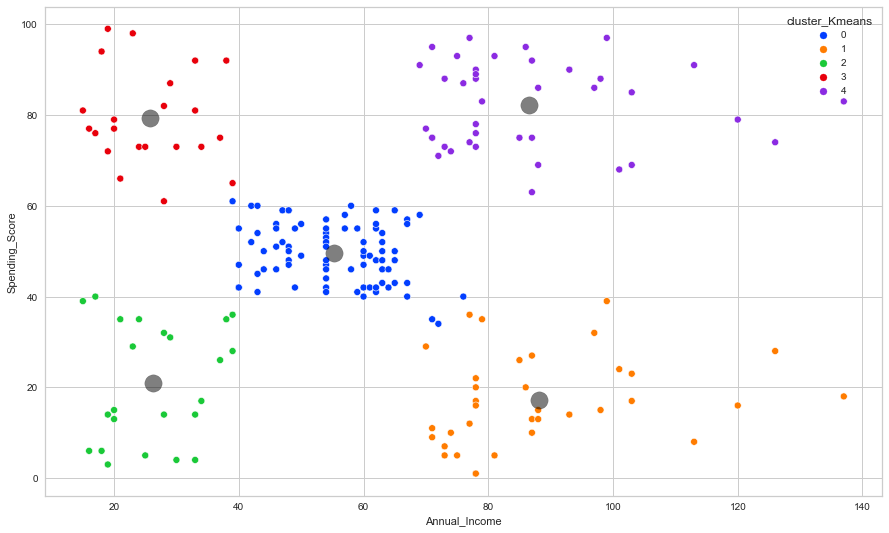

In [49]:
plt.figure(figsize=(15,9))
sns.scatterplot(x='Annual_Income', y='Spending_Score', hue='cluster_Kmeans', data=X2, palette="bright")
centers = kmeans2.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=300, alpha=0.5)

Age ve Spending_Score arasindaki clustering ve Annual_Income ve Spending_Score arasindaki clustering islemlerinin ikisinden de guzel inside' lar elde ettik. Bu ikisi de inside saglamada kullanilabilir fakat 2. islem cok daha fazla inside sagladi.

### Hierarchical Clustering

### *i. Determine optimal number of clusters using Dendogram*

K-means algoritmasi ile yaptigimiz islemleri bir de Dendogram yontemini kullanarak yapalim :

### Clustering based on Age and Spending Score- X1

In [50]:
from scipy.cluster.hierarchy import linkage

Dendogram, K-means' de kullanilan Elbow metodu gibidir. Dendogram ile bir agaclandirma yapip, kumelerin birbirleri arasindaki mesafeye bakilarak kac kume secilecegine karar verilir. Dendogram icine direk datanin kendisini veremiyoruz. 

In [51]:
hc_ward = linkage(y = X1, method = "ward")    # Varyansa gore atama islemi
hc_complete = linkage(X1, "complete")         # En uzak noktaya gore atama islemi
hc_average = linkage(X1, "average")           # Ortalamaya gore atama islemi
hc_single = linkage(X1, "single")             # En yakin noktaya gore atama islemi

Bu 4 farkli durum icin, yukarida olusturdugumuz degiskenler ile gorsellestirmemizi yapacagiz :

In [52]:
from scipy.cluster.hierarchy import dendrogram

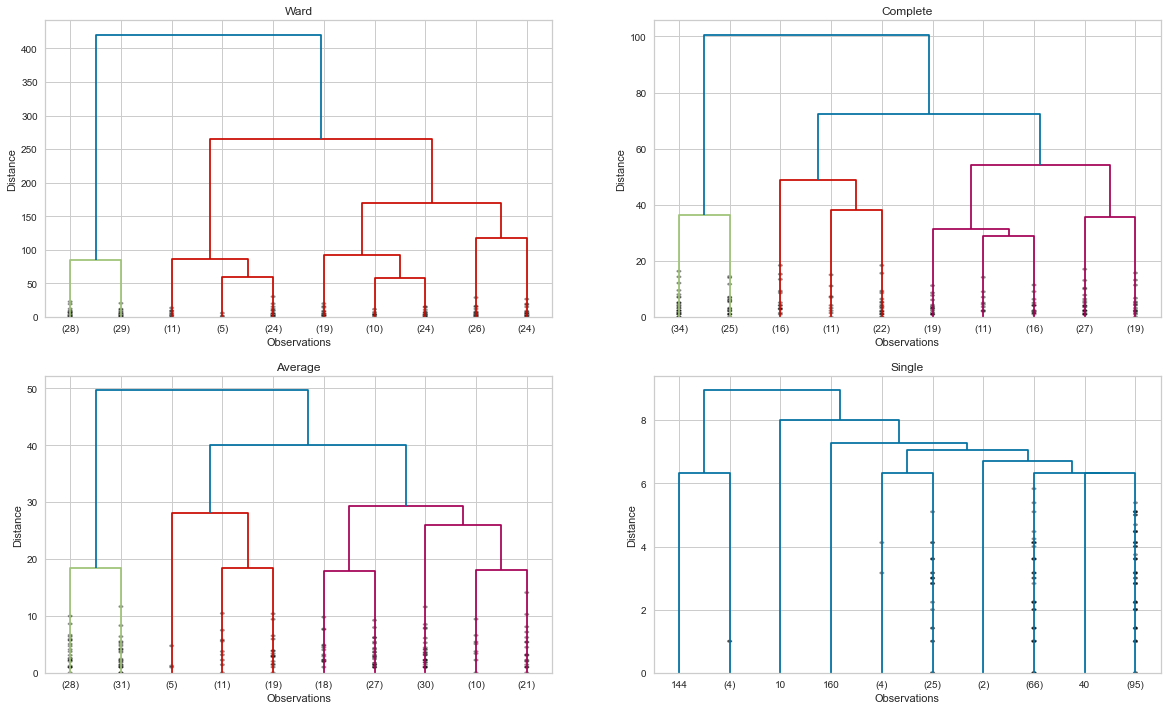

In [53]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10);

En fazla uzakligin __ward__ da oldugunu goruyoruz. Bu yuzden ward' i secerek yolumuza devam edecegiz. Ward, 3 kumeleme yapmamiz gerektigini soyluyor. Fakat 4 kumeleme sectigimizde de aradaki mesafelerin hala oldukca uzak oldugunu goruyoruz. (Hatta diger gorsellerdeki en uzak noktadan bile fazla). En uzak mesafe secilecek diye bir kaide yok. Eger guzel bir ayrim saglanabiliyorsa daha fazla kumeleme de yapilabilir. Biz kumeleme sayisini 4 olarak belirledik :

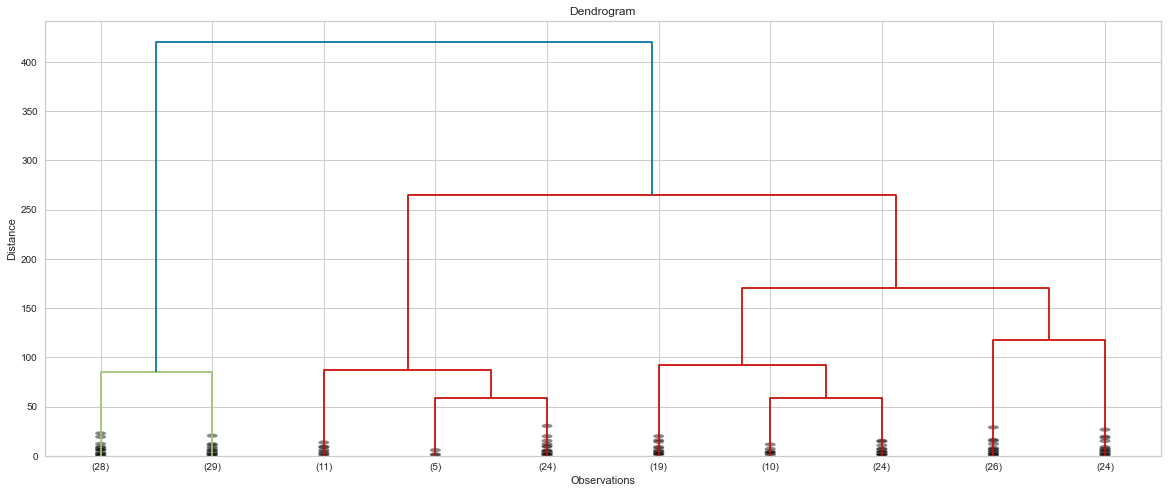

In [54]:
plt.figure(figsize = (20,8))
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10);

In [55]:
from sklearn.cluster import AgglomerativeClustering

Silhouette skoruna gore de en iyi skoru 4' te aliyoruz. Fakat farkli bir mantikla, amaca binaen farkli bir kumeleme de secilebilir :

In [56]:
from sklearn.metrics import silhouette_score
range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    Agg_model = AgglomerativeClustering(n_clusters=num_clusters)
    Agg_model.fit(X1)
    cluster_labels = Agg_model.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X1, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.45437524400798707
For n_clusters=3, the silhouette score is 0.4403939907045589
For n_clusters=4, the silhouette score is 0.4605877438219549
For n_clusters=5, the silhouette score is 0.4039101313348303
For n_clusters=6, the silhouette score is 0.4122277010437696
For n_clusters=7, the silhouette score is 0.4154024433868577
For n_clusters=8, the silhouette score is 0.387772181711837
For n_clusters=9, the silhouette score is 0.39419016298118076
For n_clusters=10, the silhouette score is 0.38799839181574464


## Clustering based on Annual Income and Spending Score- X2

Annual_Income ve Spending_Score feature' larina bir de Dendogram yontemini uygulayalim. K-means ile ayni cikarimlari yapabilecek miyiz bakalim :

In [57]:
hc_ward = linkage(y = X2, method = "ward")
hc_complete = linkage(X2, "complete")
hc_average = linkage(X2, "average")
hc_single = linkage(X2, "single")

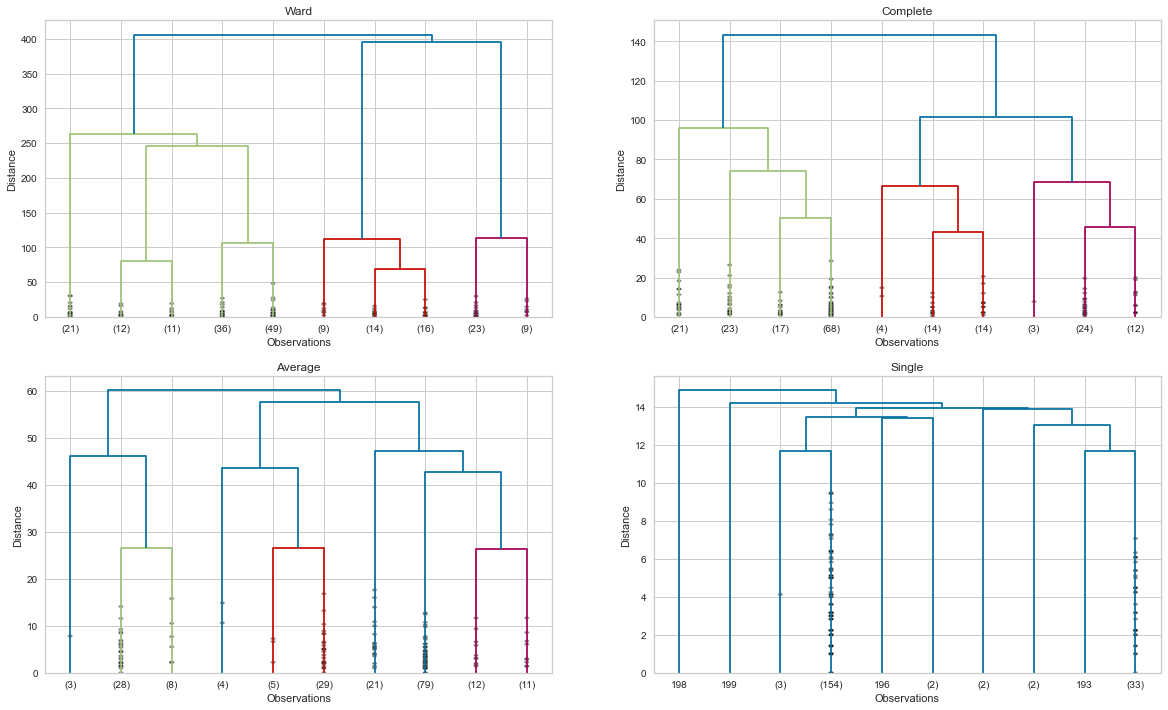

In [58]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10);

Cluster' lar arasi en uzak mesafenin __ward__ ' da oldugunu goruyoruz. Yolumuza bununla devam edecegiz. Ward' a gore en mantikli kumeleme sayisi 3. Fakat 5 kume secsek de cluster' lar arasi mesafenin oldukca uzak oldugunu goruyoruz, kumeler hala birbirinden guzel bir sekilde ayriliyor.

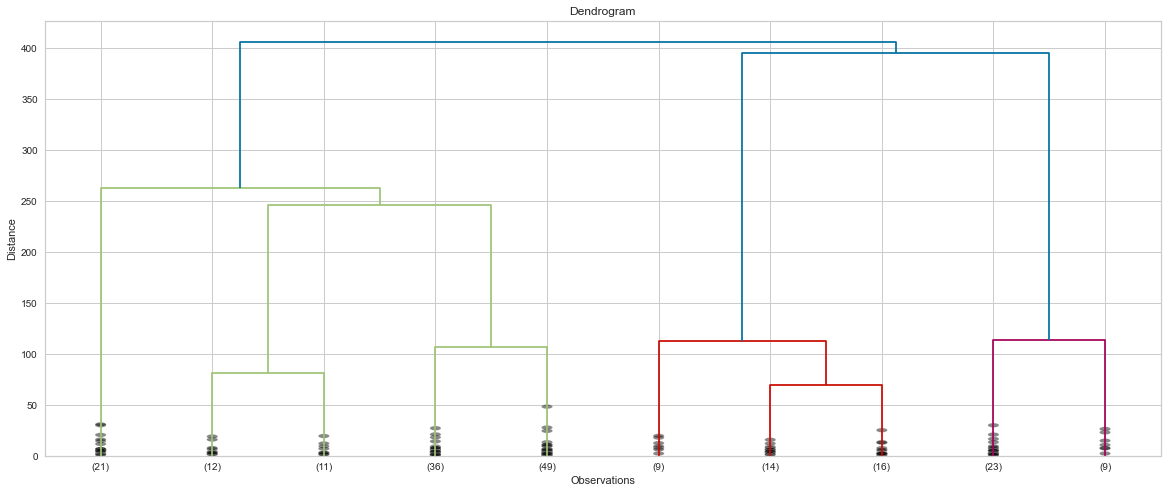

In [59]:
plt.figure(figsize = (20,8))
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10);

Silhouette score' a gore de en yuksek skoru aldigimiz cluster sayisi 5 :

In [60]:
from sklearn.metrics import silhouette_score
range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    Agg_model = AgglomerativeClustering(n_clusters=num_clusters)
    Agg_model.fit(X2)
    cluster_labels = Agg_model.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X2, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.36737734620684265
For n_clusters=3, the silhouette score is 0.462308734038414
For n_clusters=4, the silhouette score is 0.4924899099064366
For n_clusters=5, the silhouette score is 0.5541332798644271
For n_clusters=6, the silhouette score is 0.5390996397382017
For n_clusters=7, the silhouette score is 0.520894822141792
For n_clusters=8, the silhouette score is 0.43313054817610713
For n_clusters=9, the silhouette score is 0.43944465774630276
For n_clusters=10, the silhouette score is 0.4345958236001419


### ii. *Apply Agglomerative Clustering*

#### Age and Spending Score- X1

In [61]:
Agg1 = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
y_agg= Agg1.fit_predict(X1)

k_means' den elde ettigimiz sonuclari X1' e eklemistik. Simdi bir de Agglomerative sonuclarimizi X1'e ekleyelim :

In [62]:
X1['cluster_Agg'] = y_agg
X1.head()

,Age,Spending_Score,cluster_Kmeans,cluster_Agg
0,19,39,3,0
1,21,81,2,3
2,20,6,1,2
3,23,77,2,3
4,31,40,3,0


#### Annual Income and Spending Score- X2

In [63]:
Agg2 = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_agg2 = Agg2.fit_predict(X2)

k_means' den elde ettigimiz sonuclari X2' e eklemistik. Simdi bir de Agglomerative sonuclarimizi X2'e ekleyelim :

In [64]:
X2['cluster_Agg'] = y_agg2
X2.head()

,Annual_Income,Spending_Score,cluster_Kmeans,cluster_Agg
0,15,39,2,4
1,15,81,3,3
2,16,6,2,4
3,16,77,3,3
4,17,40,2,4


### iii. *Visualizing and Labeling All the Clusters* 

#### Age and Spending Score- X1

Agglomerative' den aldigimiz kumeleri de gorsellestirdik. K-means' den aldigimiz gorsele yakin bir gorsel elde ettik :

<AxesSubplot:xlabel='Age', ylabel='Spending_Score'>

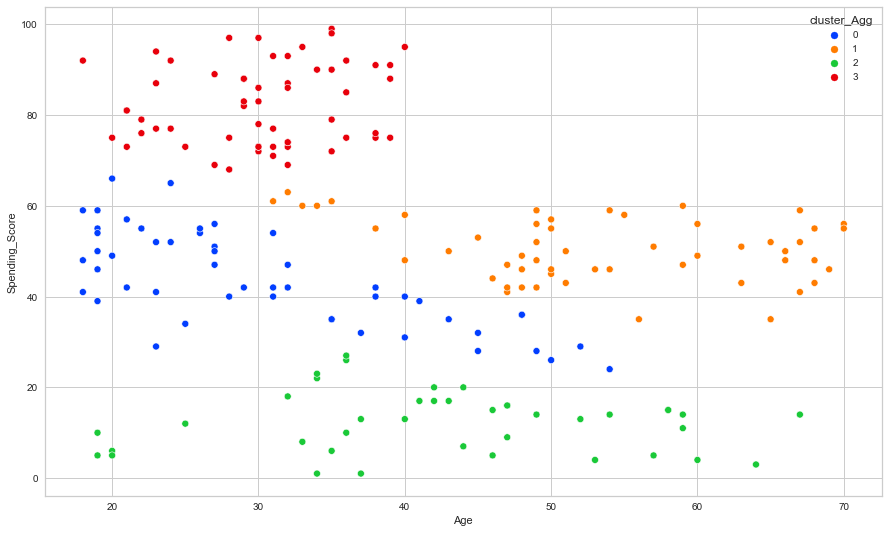

In [65]:
plt.figure(figsize=(15,9))
sns.scatterplot(x='Age', y='Spending_Score', hue='cluster_Agg', data=X1, palette="bright");

K-means ve Agglomerative' den elde ettigimiz sonuclari karsilastirdik. Ayni olan kumelere ayni renkleri vermesi icin palette' de ki renkler ile oynadik. K-means' de biraz daha iyi bir kumelenme oldugu goruluyor, Agglomerative, mavi ve yesil grubun ayrimini cok iyi yapamamis. Bu yuzden X1 icin k-means algoritmasini sececegiz :

Text(0.5, 1.0, 'Agg')

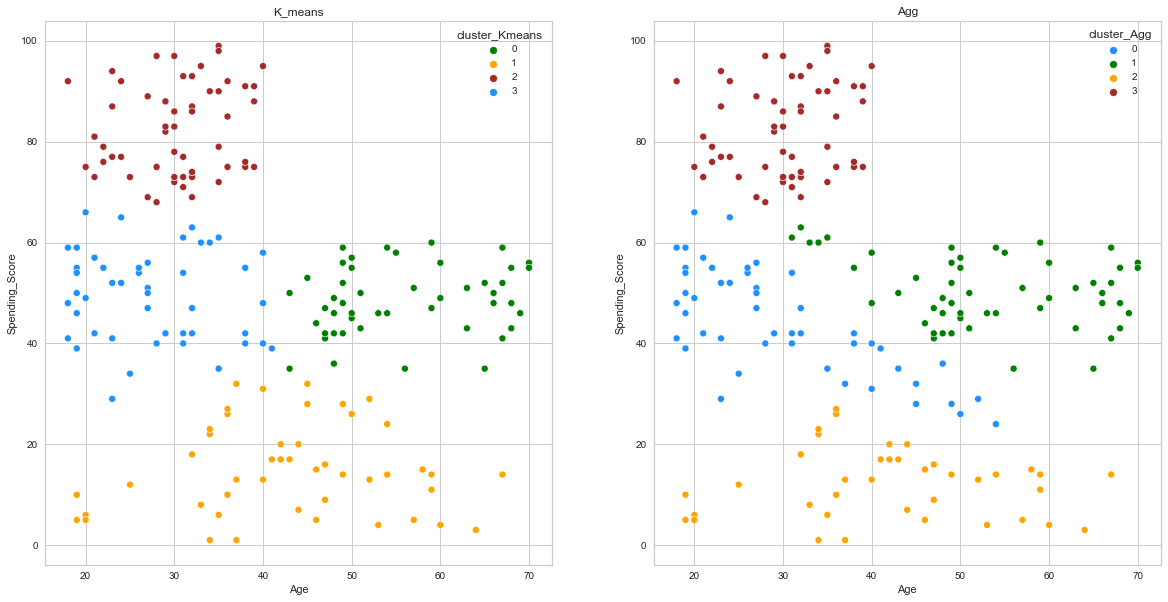

In [66]:
plt.figure(figsize = (20,10))

plt.subplot(121)
sns.scatterplot(x='Age', y='Spending_Score', hue='cluster_Kmeans', data=X1, palette=['green','orange','brown',
                                                                             'dodgerblue'])
plt.title("K_means")
plt.subplot(122)
sns.scatterplot(x='Age', y='Spending_Score', hue='cluster_Agg', data=X1, palette=['dodgerblue','green',
                                                                              'orange','brown'])
plt.title("Agg")

#### Annual Income and Spending Score- X2

Agglomerative' den elde ettigimiz gorsel :

<AxesSubplot:xlabel='Annual_Income', ylabel='Spending_Score'>

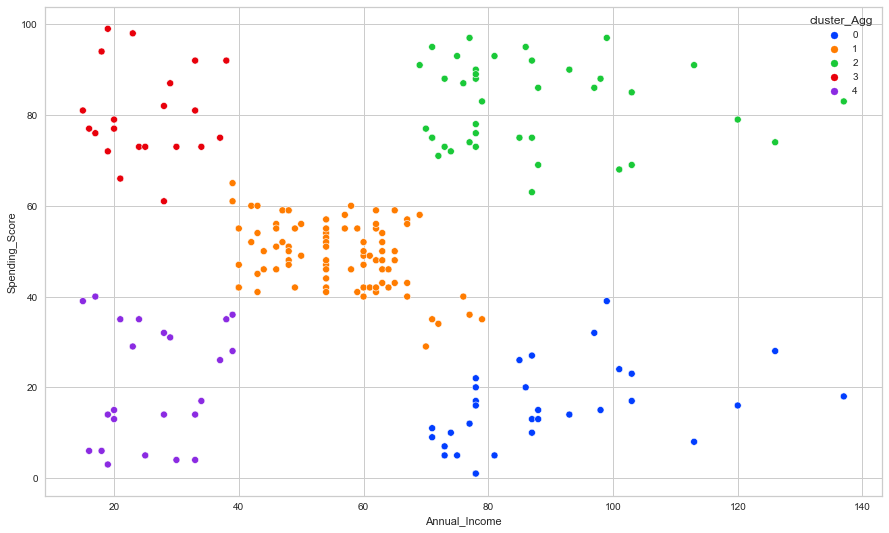

In [67]:
plt.figure(figsize=(15,9))
sns.scatterplot(x='Annual_Income', y='Spending_Score', hue='cluster_Agg', data=X2 ,palette="bright");

Agglomerative ve K-means sonuclarini gorselde karsilastirdik. Birbirlerine cok benzer goruntuler elde ettik. Yine de X2 icin de K-means Algoritmasini tercih edecegiz :

Text(0.5, 1.0, 'Agg')

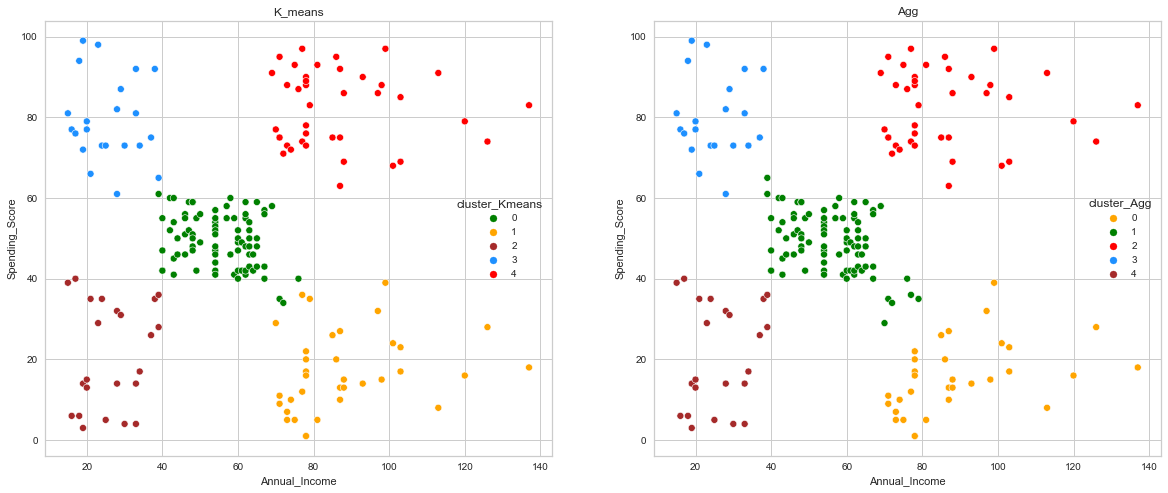

In [68]:
plt.figure(figsize = (20,8))

plt.subplot(121)
sns.scatterplot(x='Annual_Income', y='Spending_Score', hue='cluster_Kmeans', data=X2, palette=['green', 'orange',
                                                            'brown','dodgerblue','red'])
plt.title("K_means")
plt.subplot(122)
sns.scatterplot(x='Annual_Income', y='Spending_Score', hue='cluster_Agg', data=X2, palette=['orange', 'green',
                                                            'red', 'dodgerblue', 'brown'])
plt.title("Agg")

#### Interpretation based on Age and Spending Score- X1

In [69]:
X1.head()

,Age,Spending_Score,cluster_Kmeans,cluster_Agg
0,19,39,3,0
1,21,81,2,3
2,20,6,1,2
3,23,77,2,3
4,31,40,3,0


In [70]:
X1.cluster_Kmeans.value_counts()

2    57
1    48
0    48
3    47
Name: cluster_Kmeans, dtype: int64

K_means' in degerlerini kullanmaya karar verdik. Kumelenmede dengeli bir dagilim oldugunu goruyoruz :

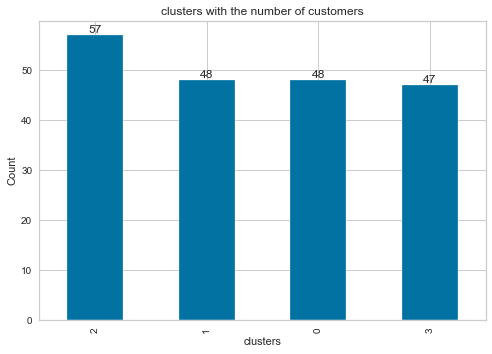

In [71]:
# lets see the number of poeple lie in each group
plt.title("clusters with the number of customers")
plt.xlabel("clusters")
plt.ylabel("Count")
ax = X1.cluster_Kmeans.value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0]);

In [72]:
df.head()

,Gender,Age,Annual_Income,Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


K-means' den elde ettigimiz degerleri df ile birlestirip, yeni data ile yeniden kumeler olusturup bunlari yorumlayacagiz :

In [73]:
df["cluster_Age_Spending_Score"] = X1.cluster_Kmeans
df.head()

,Gender,Age,Annual_Income,Spending_Score,cluster_Age_Spending_Score
0,Male,19,15,39,3
1,Male,21,15,81,2
2,Female,20,16,6,1
3,Female,23,16,77,2
4,Female,31,17,40,3


Spending_Score' u cinsiyetlere gore ayirdik. Harcama skorlarinin cinsiyetlere gore ayriminin oldugu bir inside elde etmis olduk :

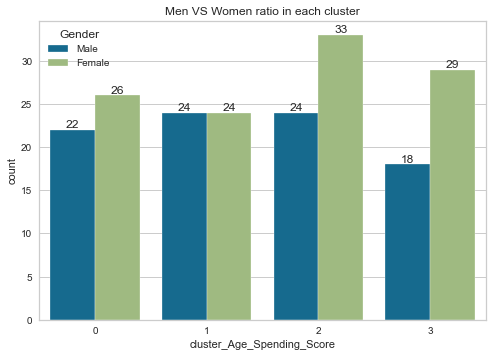

In [74]:
plt.title("Men VS Women ratio in each cluster")
plt.ylabel("Count")
ax =sns.countplot(x=df.cluster_Age_Spending_Score, hue=df.Gender)
for p in ax.containers:
    ax.bar_label(p)

Yaptigimiz cluster' lar uzerinden bir gruplandirma yaptik ve here kume icin ortalama yas skorlari, yillik gelir, harcama skorlarini aldik :

In [75]:
df.groupby("cluster_Age_Spending_Score").mean()

,Age,Annual_Income,Spending_Score
cluster_Age_Spending_Score,,,
0,55.708333,54.770833,48.229167
1,43.291667,66.937500,15.020833
2,30.175439,66.070175,82.350877
3,27.617021,53.276596,49.148936


Yasa, yillik gelire ve harcama skorlarinin tek tek cluster' larimiz ile boxplot' unu cizdirdik. 0 gurubu 50 uzeri yas grubu, 1 grubu orta yas grubu, 2 ve 3. gruplar ise biraz daha genc kitleden olusmus. Yillik gelire baktigimizda cok iyi bir ayrimin yapilamadigini goruyoruz; yogunlugun oldugu datalar genel olarak ayni yerde toplanmis. Harcama skorlarinda mavi ve pembe grup aslinda ayni grup olabilir cunku degerleri birbirlerine cok yakin. 4 cluster ile kumeleme yapmak  cok mantikli gibi gorunmuyor :

<AxesSubplot:xlabel='cluster_Age_Spending_Score', ylabel='Spending_Score'>

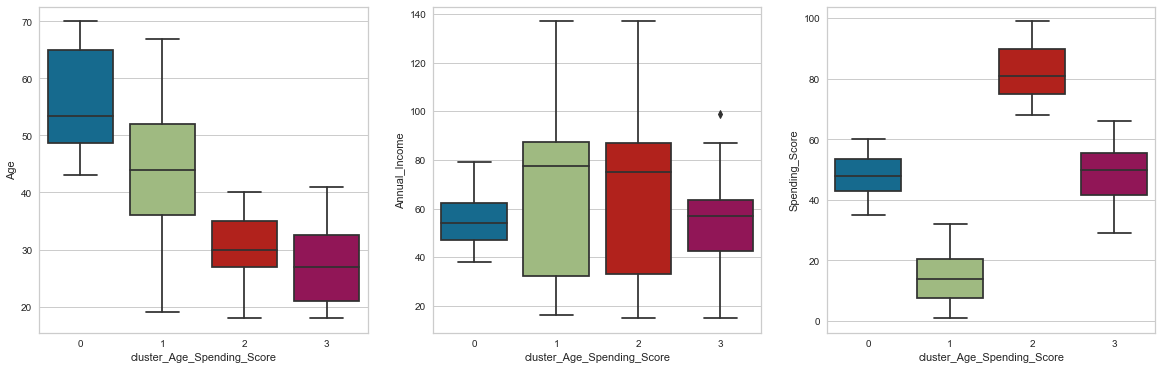

In [76]:
plt.figure(figsize = (20,6))

plt.subplot(131)
sns.boxplot(y = "Age", x = "cluster_Age_Spending_Score", data = df)

plt.subplot(132)
sns.boxplot(y = "Annual_Income", x = "cluster_Age_Spending_Score",  data = df)

plt.subplot(133)
sns.boxplot(y = "Spending_Score", x = "cluster_Age_Spending_Score", data = df);

Yogunlugun nerelerde oldugunu gormek icin bir de violinplot ile baktik. Yukarida yaptigimiz yorumlarin aynisini yapabiliriz :

<AxesSubplot:xlabel='cluster_Age_Spending_Score', ylabel='Spending_Score'>

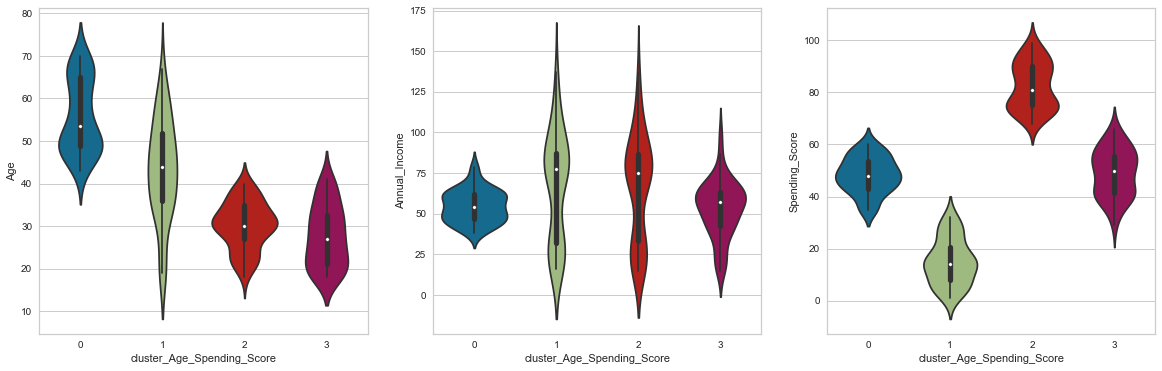

In [77]:
plt.figure(figsize = (20,6))

plt.subplot(131)
sns.violinplot(y = "Age", x = "cluster_Age_Spending_Score", data = df)

plt.subplot(132)
sns.violinplot(y = "Annual_Income", x = "cluster_Age_Spending_Score",  data = df)

plt.subplot(133)
sns.violinplot(y = "Spending_Score", x = "cluster_Age_Spending_Score", data = df);

Buldugumuz cluster' lari ile tum feature' larda gormek icin cluster' lara gore gruplama yaparak bir grafik elde ettik. 

__0 Kumesi --->__ Ortalama yasi 56, yillik gelirleri ort. 55 bin, harcama skorlari ort. 48

__3 Kumesi --->__ Ort. yas 28, yillik gelir ort. 53, harcama skoru ort. 49

0 ve 3 kumesinin yillik gelirleri ve harcama skorlari ayni. Sadece harcama yas ortalamalari farkli. Bu durumda iki grubu birbirinden ayiran tek sey yas olmus. 

__1 Kumesi --->__ Yillik gelirler fazla fakat harcamlari cok dusuk. Bu 4 cluster icinden ilk yapilmasi gereken, geliri yuksek olan bu kesimin harcama skorlarini artirmak olmali. 

__2 Kumesi --->__ Genc, gelirleri yuksek, harcamalari yuksek olan kesim. Magazanin bu musteri kitlesini korumasi gerekir.

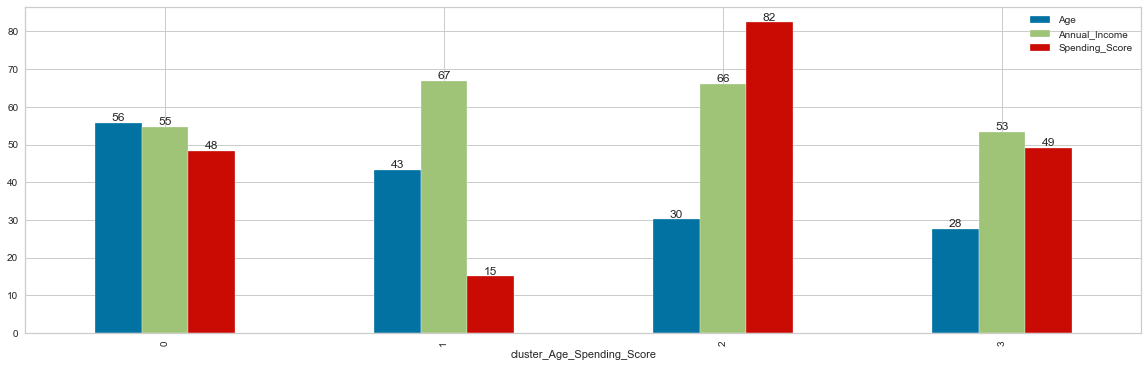

In [78]:
ax = df.groupby("cluster_Age_Spending_Score").mean().plot(kind='bar', figsize = (20,6))
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f")    # Küsuratlari gösterme.

### Conclusion

**cluster 0** : The average age is around 56. both annula_income and spending_scores are on average. 
It should be researched what can be done to direct to more spending.

**cluster 1**: The average age is around 43. the annula_income is high but the spending_scores are very low. 
This group is our target audience and specific strategies should be developed to drive this group to spend.

**cluster 2** :The average age is around 30. The annula_income is high and spending_scores are very high. 
This group consists of our loyal customers. Our company derives the main profit from this group. Very 
special promotions can be made in order not to miss it.    
    
**cluster 3**: The average age is around 28. Both annula_income and spending_scores are on average. 
It should be researched what can be done to direct to more spending.

#### Interpretation based on Annual Income and Spending Score- X2

X2 icin K-means ve Agglomerative ile yaptigimiz kumelemelerden K-means' i seciyoruz :

In [79]:
X2

,Annual_Income,Spending_Score,cluster_Kmeans,cluster_Agg
0,15,39,2,4
1,15,81,3,3
2,16,6,2,4
3,16,77,3,3
4,17,40,2,4
...,...,...,...,...
195,120,79,4,2
196,126,28,1,0
197,126,74,4,2
198,137,18,1,0


In [80]:
X2.cluster_Kmeans.value_counts()

0    81
4    39
1    35
2    23
3    22
Name: cluster_Kmeans, dtype: int64

0 kumesinde bir yogunlaslma var. Diger kume sayilari birbirlerine yakin. Asagida bu degerleri gorsellestirelim :

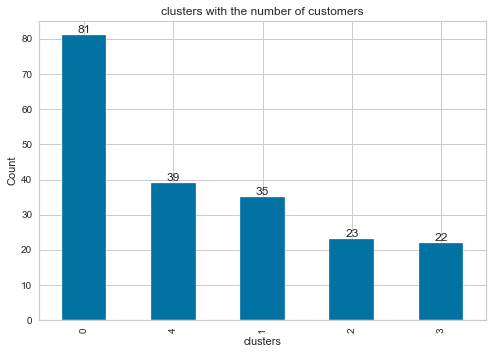

In [81]:
# lets see the number of poeple lie in each group
plt.title("clusters with the number of customers")
plt.xlabel("clusters")
plt.ylabel("Count")
ax = X2.cluster_Kmeans.value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0]);

In [82]:
df.head()

,Gender,Age,Annual_Income,Spending_Score,cluster_Age_Spending_Score
0,Male,19,15,39,3
1,Male,21,15,81,2
2,Female,20,16,6,1
3,Female,23,16,77,2
4,Female,31,17,40,3


X1' den gelen cluster' imizi df' den attik, onun yerine X2' den elde ettigimiz cluster degerlerini df' e ekledik :

In [83]:
df.drop(columns= "cluster_Age_Spending_Score", inplace=True)

In [84]:
df["cluster_Annual_Income_Spending_Score"] = X2.cluster_Kmeans
df.head()

,Gender,Age,Annual_Income,Spending_Score,cluster_Annual_Income_Spending_Score
0,Male,19,15,39,2
1,Male,21,15,81,3
2,Female,20,16,6,2
3,Female,23,16,77,3
4,Female,31,17,40,2


Her cluster icin yas gruplarinin sayilarini gosteren grafik :

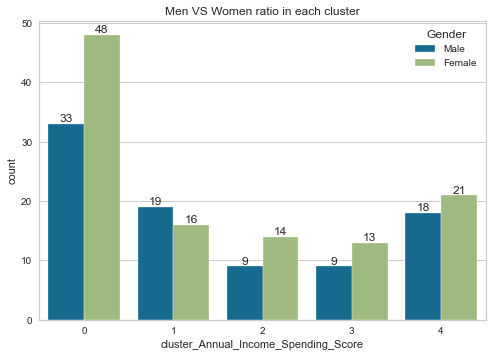

In [85]:
plt.title("Men VS Women ratio in each cluster")
plt.ylabel("Count")
ax =sns.countplot(x=df.cluster_Annual_Income_Spending_Score, hue=df.Gender)
for p in ax.containers:
    ax.bar_label(p)

Yas gruplarina ve cinsiyetlere gore nasil bir strateji gelistirmemiz gerektigine bakiyoruz. Bu yuzden her cluster' a gore cinsiyetleri gruplandirdik :

In [86]:
df.groupby(["Gender", "cluster_Annual_Income_Spending_Score"]).mean()

Age  Annual_Income  \
Gender cluster_Annual_Income_Spending_Score                             
Female 0                                     40.895833      55.354167   
       1                                     43.250000      90.937500   
       2                                     43.214286      27.357143   
       3                                     25.461538      25.692308   
       4                                     32.190476      86.047619   
Male   0                                     45.363636      55.212121   
       1                                     39.315789      85.894737   
       2                                     48.333333      24.666667   
       3                                     25.000000      25.777778   
       4                                     33.277778      87.111111   

                                             Spending_Score  
Gender cluster_Annual_Income_Spending_Score                  
Female 0                                          49.000000  
       1                                          22.062500  
       2                                          21.714286  
       3                                          80.538462  
       4                                          81.666667  
Male   0                                          50.272727  
       1                                          12.947368  
       2                                          19.666667  
       3                                          77.666667  
       4                                          82.666667

Yukarida yaptigimiz bu gruplandirmayi asagida gorsellestirdik :

__Female 0 --->__ Yillik gelirleri yuksek orta yas grubu. Daha fazla harcama yapmaya yonlendirilebilir. 

__Female 1 --->__ Yillik gelirleri cok yuksek ama harcamayanlar. Harcama yapmaya yonlendirilmeliler. (En fazla potansiyele sahip grup)

__Female 2 --->__ Geliri az, harcamasi az.

__Female 3 --->__ Geliri az, harcamasi fazla olan kampanyaci grup :)

Male grubu icin de benzer gruplar oldugunu goruyoruz. Ama kadinlarin harcamalarinin erkeklere gore daha fazla oldugunu soyleyebiliriz. 

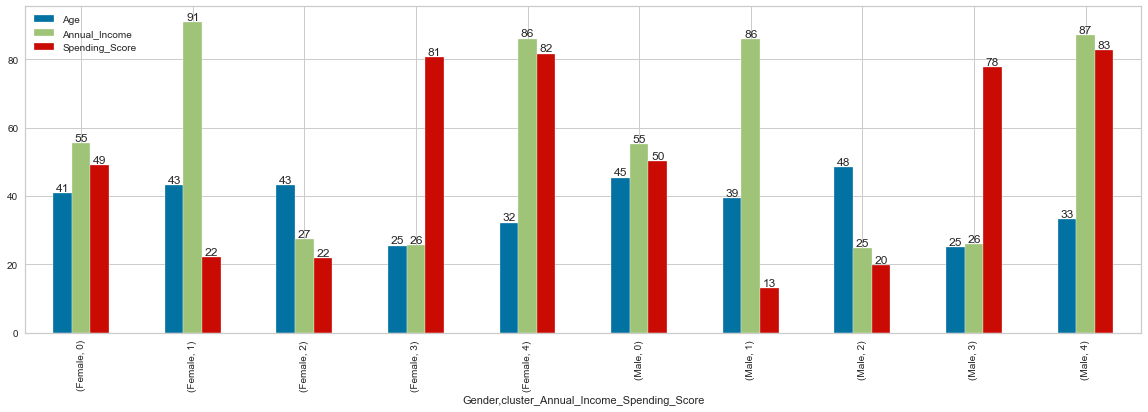

In [89]:
ax = df.groupby(["Gender", "cluster_Annual_Income_Spending_Score"]).mean().plot(kind="bar", figsize=(20,6))
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f")

<AxesSubplot:xlabel='cluster_Annual_Income_Spending_Score', ylabel='Spending_Score'>

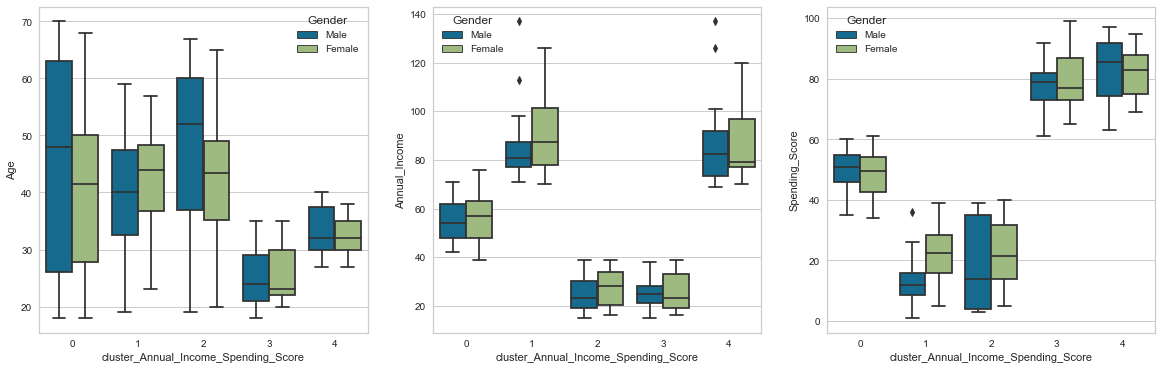

In [87]:
plt.figure(figsize = (20,6))

plt.subplot(131)
sns.boxplot(y = "Age", x = "cluster_Annual_Income_Spending_Score", hue= "Gender", data = df)

plt.subplot(132)
sns.boxplot(y = "Annual_Income", x = "cluster_Annual_Income_Spending_Score", hue= "Gender", data = df)

plt.subplot(133)
sns.boxplot(y = "Spending_Score", x = "cluster_Annual_Income_Spending_Score", hue= "Gender", data = df)

__0 Kumesi --->__ Yas araligi genis, yillik gelirleri ortalama, harcama skorlari ortalama.

__1 Kumesi --->__ Yas araligi orta yas, yillik gelirleri yuksek, harcama skorlari cok dusuk.

__2 Kumesi --->__ Yas araligi orta yas ve uzeri, yillik gelirleri dusuk, harcama skorlari dusuk.

__3 Kumesi --->__ Yas araligi dusuk, yiilik gelirleri dusuk, harcama skorlari cok yuksek.

__4 Kumesi --->__ Yas araligi ortalama ve biraz alti, yillik gelirleri yuksek, harcama skorlari da yuksek.

5 cluster ile cok daha fazla inside elde ettigimizi soyleyebiliriz.

<AxesSubplot:xlabel='cluster_Annual_Income_Spending_Score', ylabel='Spending_Score'>

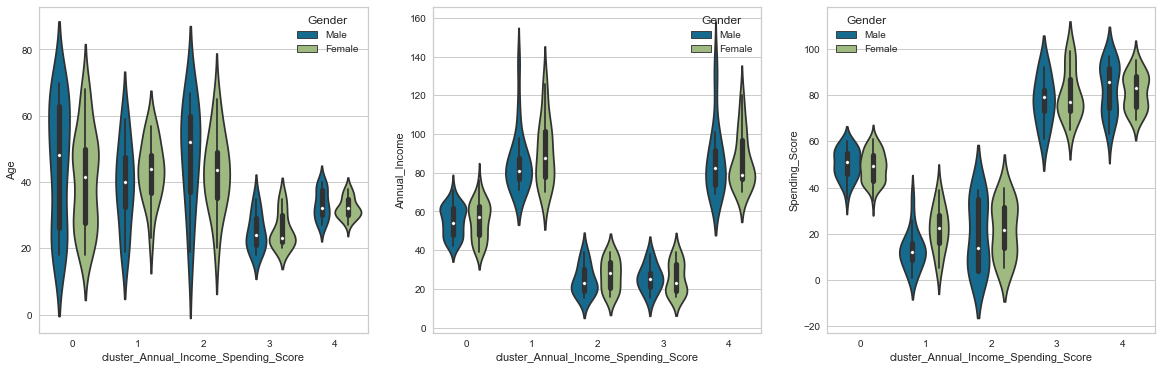

In [88]:
plt.figure(figsize = (20,6))

plt.subplot(131)
sns.violinplot(y = "Age", x = "cluster_Annual_Income_Spending_Score", hue= "Gender", data = df)

plt.subplot(132)
sns.violinplot(y = "Annual_Income", x = "cluster_Annual_Income_Spending_Score", hue= "Gender", data = df)

plt.subplot(133)
sns.violinplot(y = "Spending_Score", x = "cluster_Annual_Income_Spending_Score", hue= "Gender", data = df)

## Conclusion

### Female

**cluster 0** : The average age is around 41, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 43, the annula_income is very high but the spending_scores is low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 43. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 32, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

### Male

**cluster 0** : The average age is around 45, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 39, the annula_income is very high but the spending_scores is very low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 48. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 33, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

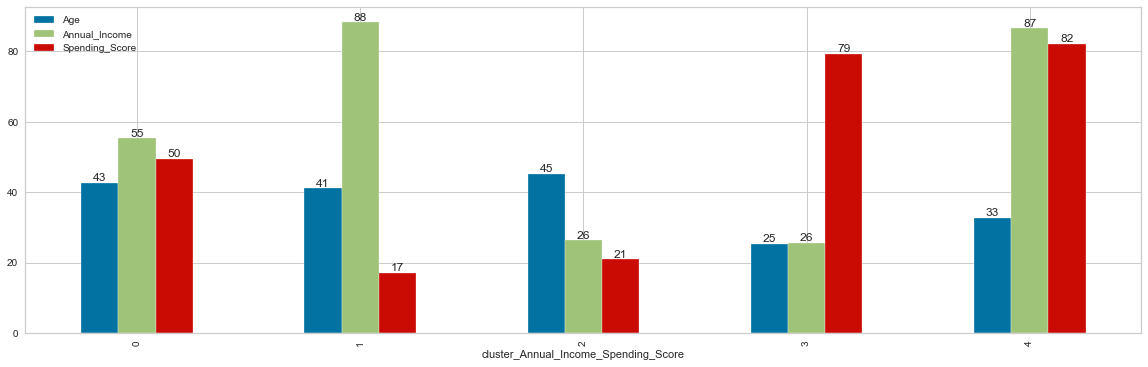

In [91]:
ax = df.groupby("cluster_Annual_Income_Spending_Score").mean().plot(kind='bar', figsize = (20,6))
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f")

**cluster 0** : The average age is around 43, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 41, the annula_income is very high but the spending_scores is very low. This group is our target audience and special strategies need to be developed for this group.

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 33, the annual income and the spending_score is very high. This group consists of our loyal customers. Our company derives the main profit from this group. Very special promotions can be made in order not to miss it.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___